- **Nombre:** Isabella María Ucrós Muñoz  
- **Código:** 2240675
# **Clase 8, ejercicio 1**

In [1]:
# Librerias
import sympy
from sympy import *

### **Punto A**

In [15]:
x, y = symbols('x y')

In [20]:

# BASE PARA EL ESPACIO TENSORIAL

# Vamos a definir la base de monomios:
M = [1, x, x**2]
N = [1, y, y**2]

# Como es posible hacer un isomorfismo entre el producto tensorial entre polinomios y el producto usual entre ellos, para encontrar la base del espacio
# tensorial basta con a cada 

basetensor = []

k = 0
for i in range(3):
    for j in range(3):
        baseij = Matrix.zeros(9,1)
        baseij[k, 0] = M[i] * N[j]
        basetensor.append(baseij)
        k +=1

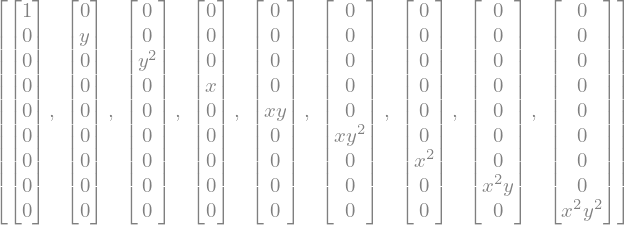

In [21]:
init_printing()
basetensor

In [22]:
# Ahora bien, suponga que tenemos dos polinomios p2(x) y g2(y) arbitrarios. Calculemos el producto tensorial y luego los componentes sobre esa base
a0, a1, a2, b0, b1, b2 = symbols('a0 a1 a2 b0 b1 b2')
p2 = a0 + a1 * x + a2 * x**2
g2 = b0 + b1 * y + b2 * y**2

# COMPONENTES sobre la base de monomios:
coefp2 = [ (expand(p2)).coeff(x, i) for i in range(3) ]                 # Primero expandimos el polinomio y luego extraemos los coeficientes
coefg2 = [ (expand(g2)).coeff(y, i) for i in range(3) ]

descompP2 = [ ( (expand(p2)).coeff(x, i) * x**i ) for i in range(3) ]   # Ponemos en una lista cada uno de los términos junto con su respectiva base
descompG2 = [ ( (expand(g2)).coeff(y, i) * y**i ) for i in range(3) ]

# De modo que:
p2, g2

In [23]:
descompP2, descompG2

In [5]:
# Entonces, el producto tensorial entre p2 y g2 es:
prodtensp2g2 = tensorproduct( descompP2 , descompG2 )
prodtensp2g2


[[a0*b0, a0*b1*y, a0*b2*y**2], [a1*b0*x, a1*b1*x*y, a1*b2*x*y**2], [a2*b0*x**2, a2*b1*x**2*y, a2*b2*x**2*y**2]]

In [6]:
# Como fue esperado, es posible identificar a cada una de las bases calculadas anteriormente en el producto tensorial multiplicadas por las componentes
# de los vectores originales. Entonces, para encontrar la matriz de componentes Cij, es solo armar una matriz con el producto de las componentes i y j-ésimas:

## Sea coefp y coefg la lista con los coeficientes en las bases sobre las cuales se calculen las bases del producto tensorial:

def Cij(coefp, coefg):
    n = len(coefp)
    m = len(coefg)
    Cijex = Matrix.zeros(n, m)
    for i in range(n):
        for j in range(m):
            Cijex[i, j] = coefp[i] * coefg[j]
    return Cijex

In [7]:
Cij(coefp2, coefg2)

Matrix([
[a0*b0, a0*b1, a0*b2],
[a1*b0, a1*b1, a1*b2],
[a2*b0, a2*b1, a2*b2]])

In [8]:
# Hagamos el cálculo para una entrada ingresada por el usuario:

# Le pediremos al usuario que ingrese sus polinomios, para que luego el programa devuelva las compentes Cij en términos de la base de monomios.
p1str = str(input("Ingrese su polimonio de grado dos de P2(x)"))
g1str = str(input("Ingrese su polimonio de grado dos de G2(y)"))

p1 = sympify(p1str)             # Convertir de texto a una expresión simbólica
g1 = sympify(g1str)

# Haciendo una lista con los coeficientes en la base de monomios:
coefp1 = [ (expand(p1)).coeff(x, i) for i in range(3) ]                 # Primero expandimos el polinomio y luego extraemos los coeficientes
coefg1 = [ (expand(g1)).coeff(y, i) for i in range(3) ]

In [24]:
# Los polinomios son:
p1, g1

In [10]:
# Su prod tensorial (análogo)
descompP1 = [ ( (expand(p1)).coeff(x, i) * x**i ) for i in range(3) ]  
descompG1 = [ ( (expand(g1)).coeff(y, i) * y**i ) for i in range(3) ]

tensorproduct( descompP1, descompG1 )

[[8, -y, 0], [24*x, -3*x*y, 0], [64*x**2, -8*x**2*y, 0]]

In [11]:
# Y la matriz de coeficientes:

Cij( coefp1, coefg1 )

Matrix([
[ 8, -1, 0],
[24, -3, 0],
[64, -8, 0]])

### **Punto B**

In [12]:
# Caso análogo al ejercicio anterior:

pP = x**2 + x + 3
pG = y + 1

pPdescomp = [ ( (expand(pP)).coeff(x, i) * x**i ) for i in range(3) ]
pGdescomp = [ ( (expand(pG)).coeff(y, i) * y**i ) for i in range(3) ]

# El producto tensorial (exterior) será:
tensorproduct(pPdescomp, pGdescomp).reshape(9, 1)       # Como trabajamos con dos vectores (no covectores), la notación correcta es un arreglo de 9x1

[[3], [3*y], [0], [x], [x*y], [0], [x**2], [x**2*y], [0]]

### **Punto C**

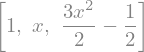

In [50]:
p3 = x**2 + x + 3
# Ahora, elijamos las bases de Legendre:
legendre_basex = [legendre( m , x ) for m in range(3) ]
legendre_basex

In [51]:
# Definamos el prodcuto interno dentro del primer eV:
def prodintP(p1, p2):
    pd = integrate( p1 * p2, (x, -1, 1))
    return pd

In [56]:
# Ahora bien, como es conocido que la base de legendre es ortogonal, para poder encontrar las componentes del p3 sobre dicha base basta con proyectar
# sobre las bases encontradas anteriormente:

def coefsP(h):                                                           # <-- Función de python que, dado un pol genérico, regresa sus coeficientes
    coef = []                                                           # bajo la base de Legendre
    for i in range(3): #3 porque son la cantidad de coeficientes sobre los cuales vamos a proyectar:
        ci = ( prodintP( h , legendre_basex[i] ) / prodintP( legendre_basex[i] , legendre_basex [i] ) )
        coef.append(ci)
    return coef

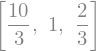

In [57]:
coefsp3 = coefsP(p3)
coefsp3

In [55]:
# Comprobando que efectivamente estos son los componentes:
p3prueba = 0
for i in range(3):
    k = coefsp3[i] * legendre_basex[i]
    p3prueba += k
p3prueba

### **Punto D**

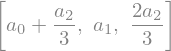

In [ ]:
# Para el desarrollo de este punto es posible partir de la función de python que habíamos armado, Cij, en donde para obtener la matriz de componentes
# solo necesitabamos saber cómo expresar dicha polinomio en términos de la base usada. Así, sean los polinomios iniciales, encontremos sus componentes
# en la base de polinomios de Legendre:


# PARA P EN COMPONENTES:

p2 = a0 + a1 * x + a2 * x**2

coefp2_legr = coefsP(p2)
coefp2_legr

In [58]:
# Planteemos el prod interno y la proyección sobre los pol de legendre pero sobre y:
legendre_basey = [legendre( m , y ) for m in range(3) ]

def prodintG(g1, g2):
    pd = integrate( g1 * g2, (y, -1, 1))
    return pd

def coefsG(h):                                                           
    coef = []                                                          
    for i in range(3):
        ci = ( prodintG( h , legendre_basey[i] ) / prodintG( legendre_basey[i] , legendre_basey[i] ) )
        coef.append(ci)
    return coef

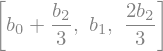

In [59]:
g2 = b0 + b1 *y + b2 * y**2

coefg2_legr = coefsG(g2)
coefg2_legr

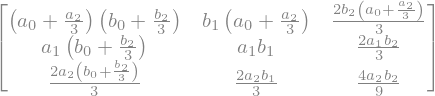

In [ ]:
# ¡★! Ahora, ya con los coeficientes ortogonales (sobre la base de Legendre), nos basta con aplicar Cij (multiplicar componente a compononte)

Cij_legr = Cij(coefp2_legr, coefg2_legr)
Cij_legr

In [ ]:
# Calculemos las bases de este producto tensorial:
basetensor_legr = []

k = 0
for i in range(3):
    for j in range(3):
        baseij = Matrix.zeros(9,1)
        baseij[k, 0] = legendre_basey[i] * legendre_basey[j]
        basetensor_legr.append(baseij)
        k +=1

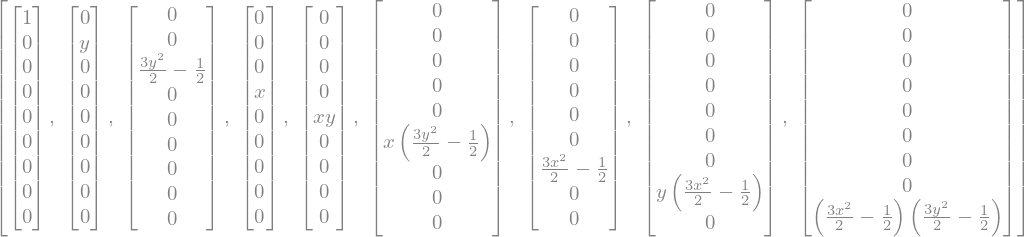

In [62]:
basetensor_legr

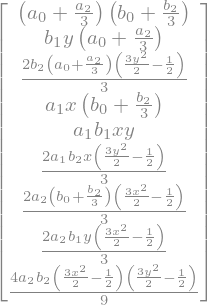

In [64]:
# Para corroborar lo anterior, es posible hacer el prod tensorial entre los vectores:

p2descomLegr = [ coefp2_legr[i] * legendre_basex[i] for i in range(3) ]
g2descomLegr = [ coefg2_legr[i] * legendre_basey[i] for i in range(3) ]

tensorproduct(p2descomLegr, g2descomLegr).reshape(9,1)